In [1]:
from pycocotools.coco import COCO
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches

sns.set(rc={'figure.figsize':(13,13)})

In [2]:
def plot_img(coco,label2name,idx,root='input/data'):
    bbox_thick = int(0.6 * (512 + 512) / 600)
    fontScale = 0.5

    classes = ("UNKNOWN", "General trash", "Paper", "Paper pack", 
    "Metal", "Glass",  "Plastic", "Styrofoam", 
    "Plastic bag", "Battery", "Clothing")

    RGB_cols = [(0,0,0), (255,255,0), (0,255,0), (0,0,255),
     (0,255,255), (255,0,255), (128,0,255),(128,128,128),
    (255,128,0),(0,255,128),(255,0,0)]
    colors = ['#000000', '#FFFF00', '#00FF00', '#0000FF', 
                    '#00FFFF', '#FF00FF', '#8000FF', '#808080',
                    '#FF8000','#00FF80', '#FF0000']

    ann_ids = coco.getAnnIds(idx)
    ann_info = coco.loadAnns(ann_ids)
    
    info = coco.loadImgs(idx)[0]
    img = cv2.imread(os.path.join(root,info['file_name']))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(13,13))

    unique_label =set()

    for ann in ann_info:
        unique_label.add(ann['category_id'])
        box_color = RGB_cols[ann['category_id']]
        cls_name = label2name[ann['category_id']]
        x1, y1, w, h = ann['bbox']
        img = cv2.rectangle(img,(int(x1),int(y1)),(int(x1+w),int(y1+h)),box_color,2)
        t_size = cv2.getTextSize(cls_name, 0, fontScale, thickness=bbox_thick // 2)[0]
        t = (int(x1 + t_size[0]), int(y1 - t_size[1] - 3))
        img = cv2.rectangle(img, (int(x1),int(y1)), (t[0], t[1]), box_color, -1)
        img = cv2.putText(img, cls_name, (int(x1), int(y1 - 2)), cv2.FONT_HERSHEY_SIMPLEX,
                fontScale, (0, 0, 0), bbox_thick // 2, lineType=cv2.LINE_AA)
    
    plt.legend(handles = [mpatches.Patch(color=colors[c], label=label2name[c]) for c in unique_label] , bbox_to_anchor=(1,1), loc='upper left')
    plt.title(f'id = {idx}, file_name = {info["file_name"]}')
    plt.imshow(img)
    plt.grid(False)
    plt.show()

In [3]:

coco = COCO('input/data/train_all.json')
cat_ids = coco.loadCats(coco.getCatIds())
label2name = [cat['name'] for cat in cat_ids]



loading annotations into memory...
Done (t=10.81s)
creating index...
index created!


In [4]:
len(coco.getImgIds())

3272

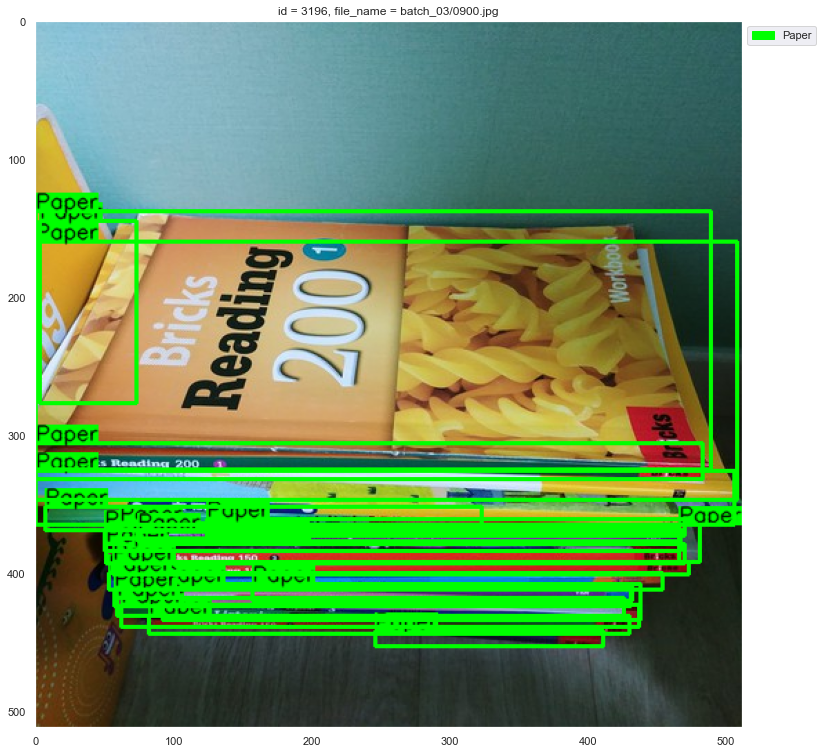

In [5]:
plot_img(coco,label2name,3196)

In [6]:


def get_info(coco):
    width,height,ratio,classes,img,ids,areas = [],[],[],[],[],[],[]
    for idx in range( len( coco.getImgIds() ) ):
        ann_ids = coco.getAnnIds(idx)
        ann_info = coco.loadAnns(ann_ids)
        img_name = coco.loadImgs(idx)[0]['file_name']
    
        for ann in ann_info:
            cls_name = label2name[ann['category_id']]
            x1, y1, w, h = ann['bbox']
            width.append(w)
            height.append(h)
            ratio.append(w/h)
            classes.append(cls_name)
            img.append(img_name)
            ids.append(idx)
            areas.append(w*h)
    df = pd.DataFrame()
    df['w'] = width
    df['h'] = height
    df['ratio'] = ratio
    df['name'] = classes
    df['img_name'] = img_name
    df['id'] = ids
    df['area'] = areas
    return df

In [7]:
info = get_info(coco)
info

w      h     ratio         name           img_name    id      area
0      161.9  159.8  1.013141  Plastic bag  batch_03/1000.jpg     0  25871.62
1       72.6   52.7  1.377609  Plastic bag  batch_03/1000.jpg     0   3826.02
2       68.3   86.5  0.789595      Plastic  batch_03/1000.jpg     0   5907.95
3      117.3  183.0  0.640984        Glass  batch_03/1000.jpg     0  21465.90
4       80.0  293.4  0.272665        Glass  batch_03/1000.jpg     0  23472.00
...      ...    ...       ...          ...                ...   ...       ...
26395   28.9   82.9  0.348613        Paper  batch_03/1000.jpg  3270   2395.81
26396   17.7   24.1  0.734440        Paper  batch_03/1000.jpg  3270    426.57
26397  112.8  147.7  0.763710        Paper  batch_03/1000.jpg  3270  16660.56
26398   16.7   85.6  0.195093        Paper  batch_03/1000.jpg  3270   1429.52
26399  124.9  272.0  0.459191        Metal  batch_03/1000.jpg  3271  33972.80

[26400 rows x 7 columns]

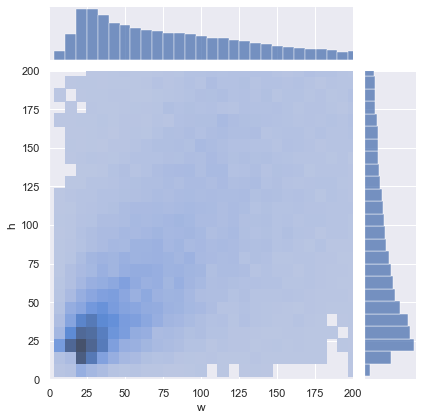

In [8]:
plot = sns.jointplot(data=info, x="w", y="h", kind="hist")
plot.ax_marg_x.set_xlim(0, 200)
plot.ax_marg_y.set_ylim(0, 200)
plt.show()


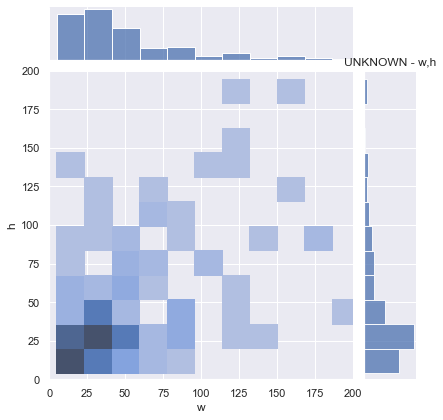

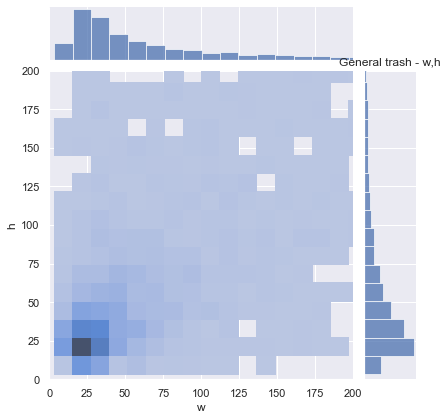

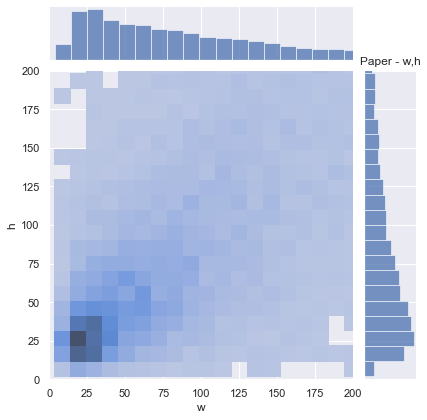

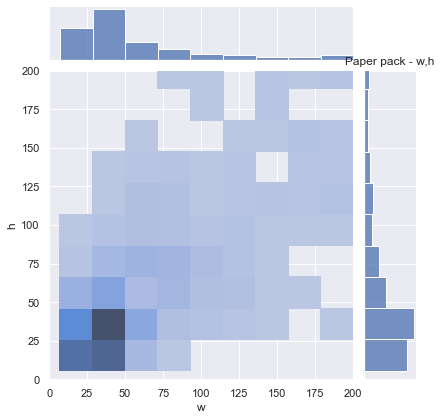

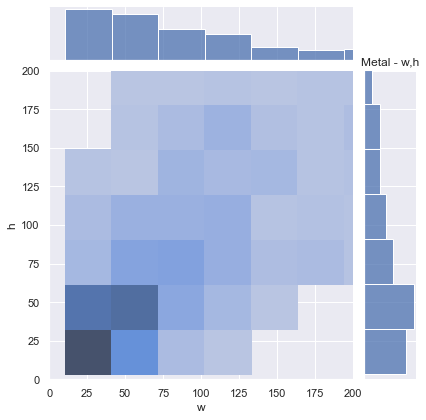

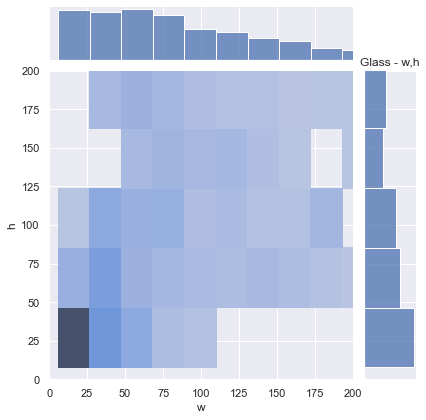

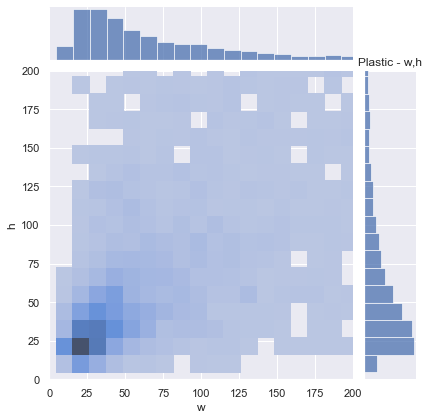

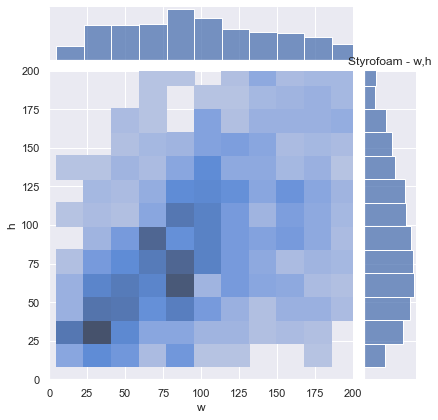

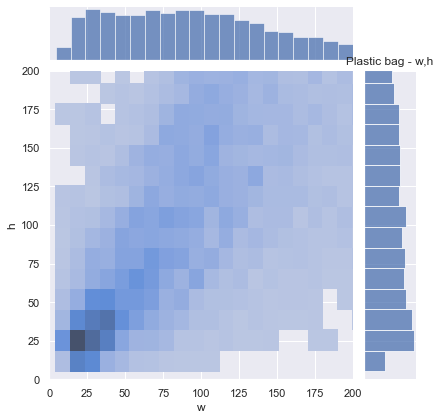

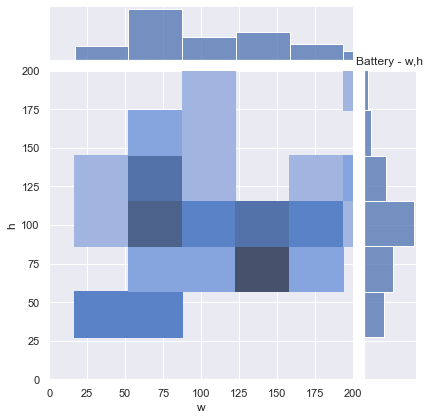

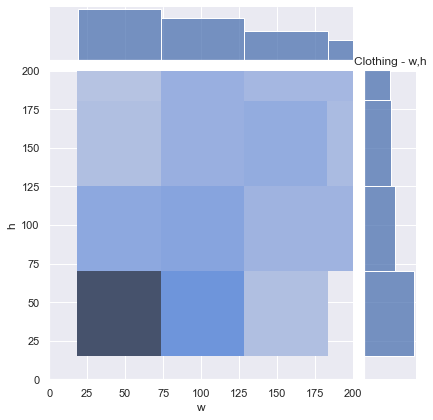

In [9]:
classes = ("UNKNOWN", "General trash", "Paper", "Paper pack", 
    "Metal", "Glass",  "Plastic", "Styrofoam", 
    "Plastic bag", "Battery", "Clothing")


for c in classes:
    cls_df = info[info['name'] == c]
    plot = sns.jointplot(data=cls_df, x="w", y="h", kind="hist")
    plot.ax_marg_x.set_xlim(0, 200)
    plot.ax_marg_y.set_ylim(0, 200)
    plt.title(f'{c} - w,h')
    plt.show()

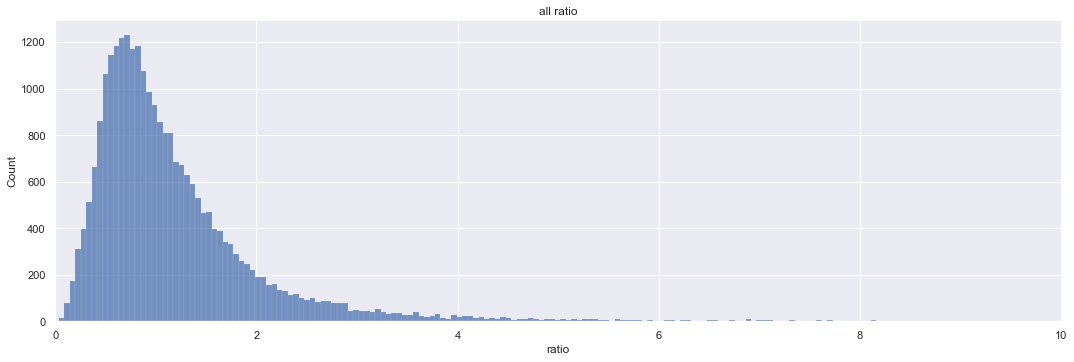

In [10]:

plot = sns.displot(data=info, x="ratio", aspect=3)
plt.title('all ratio')
plt.xlim(0, 10)
plt.show()

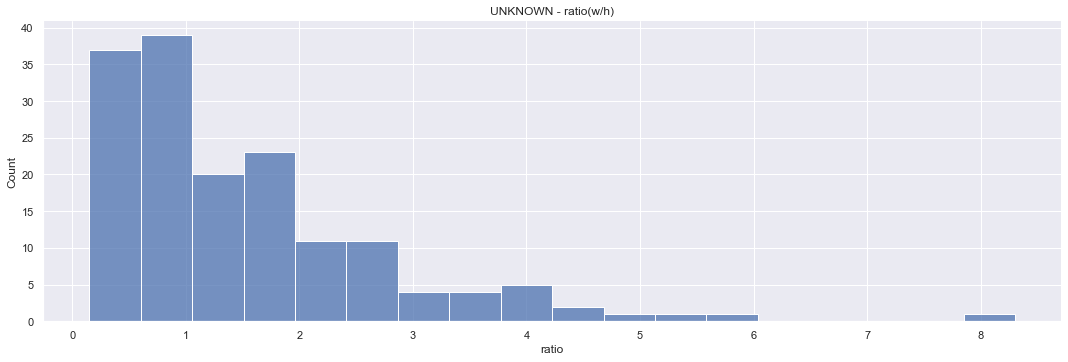

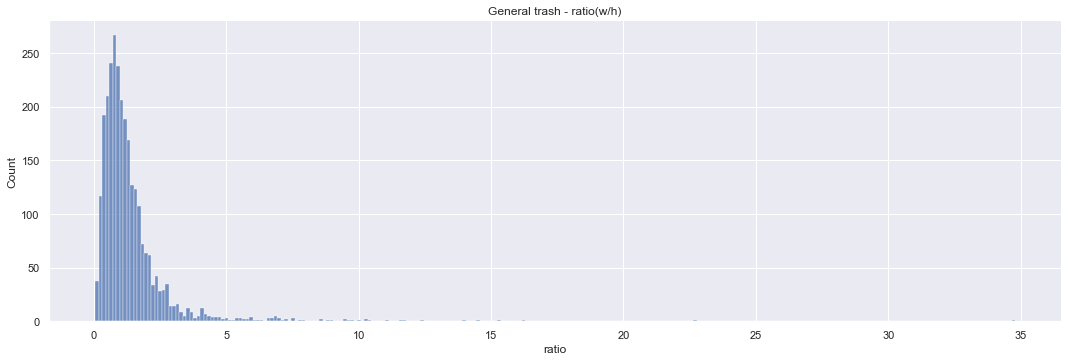

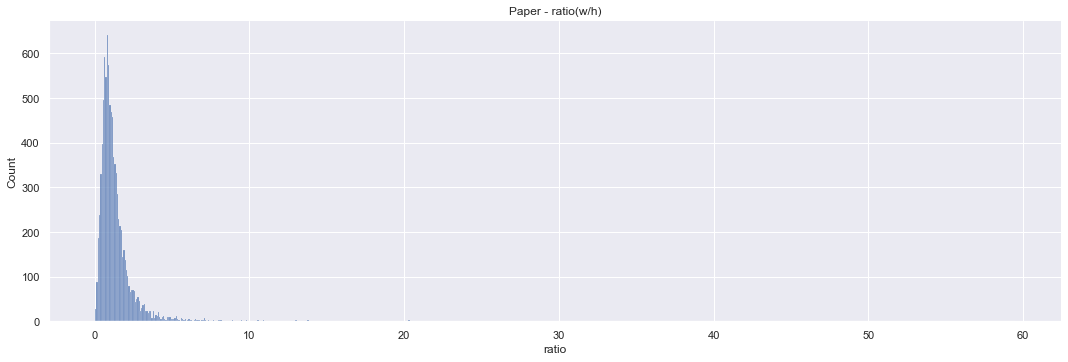

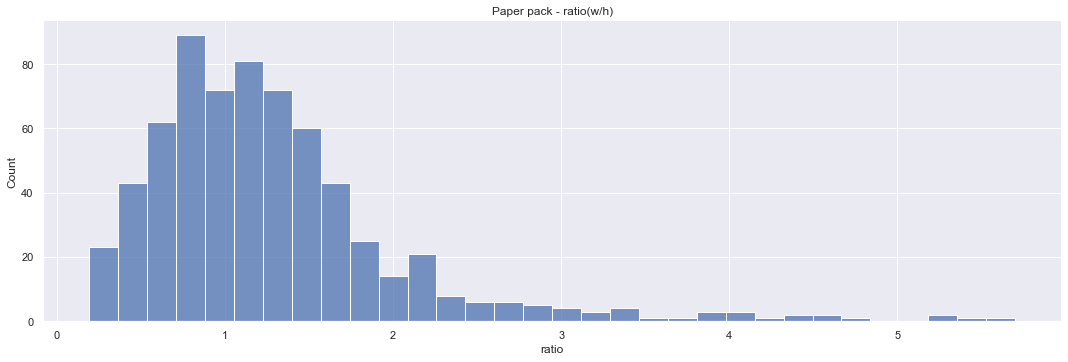

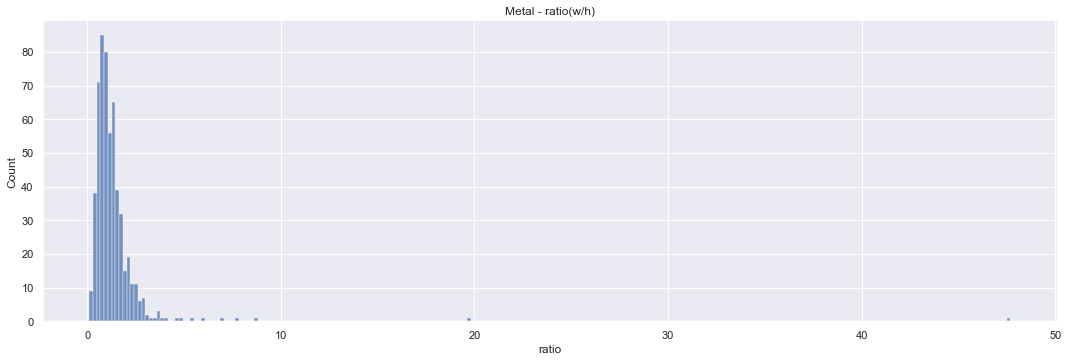

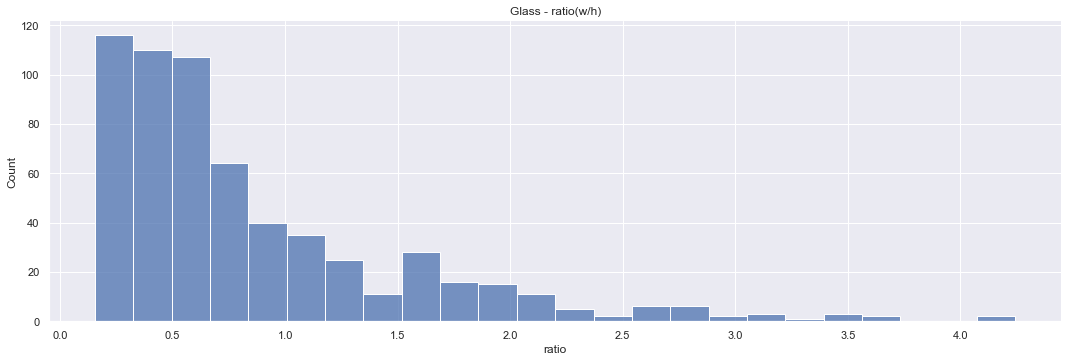

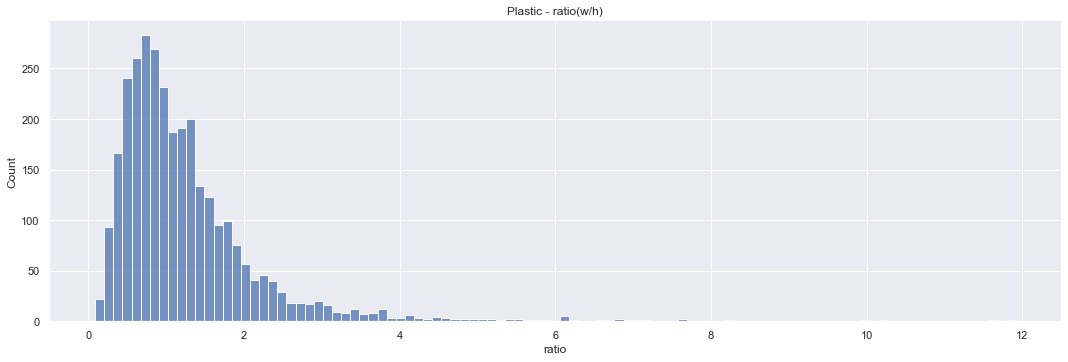

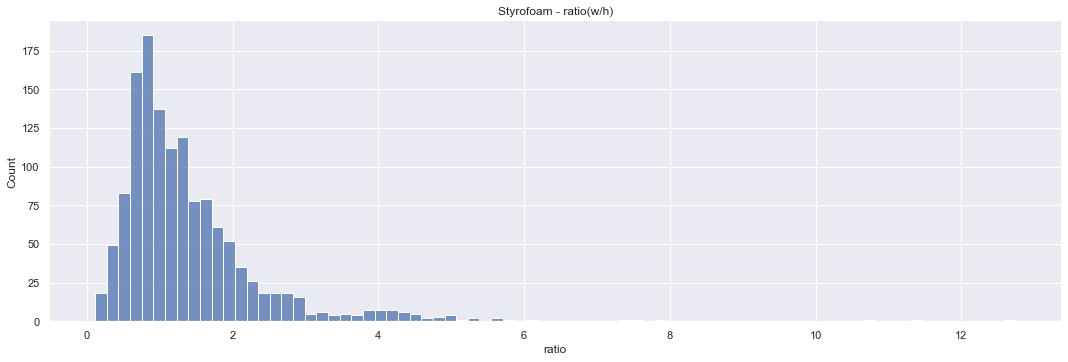

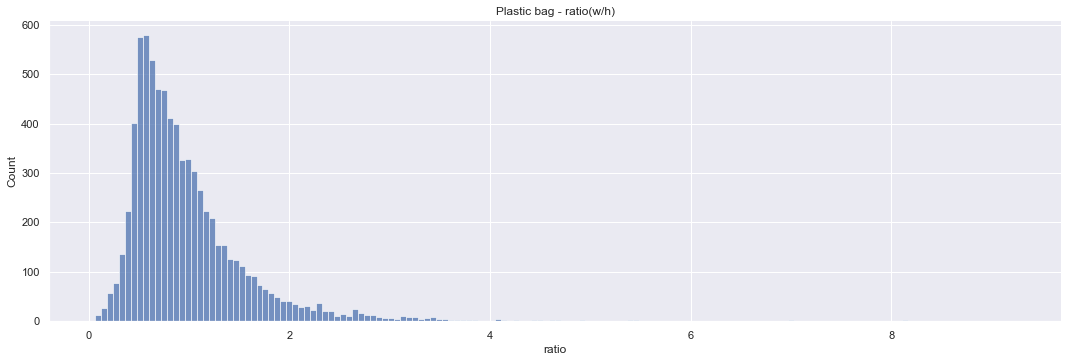

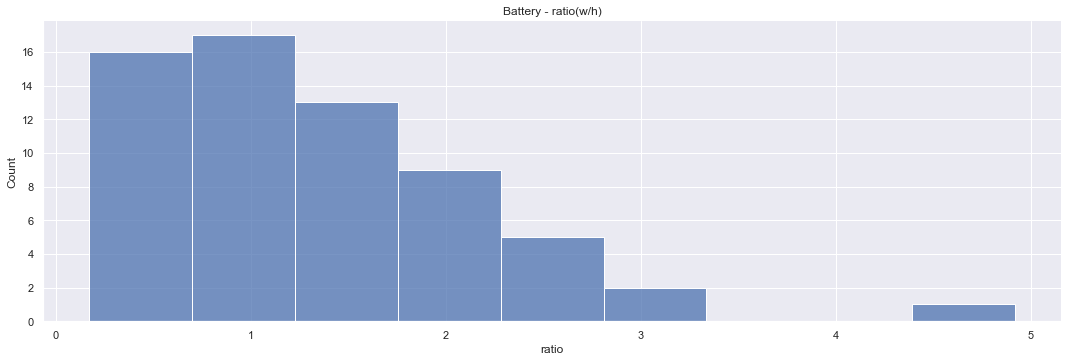

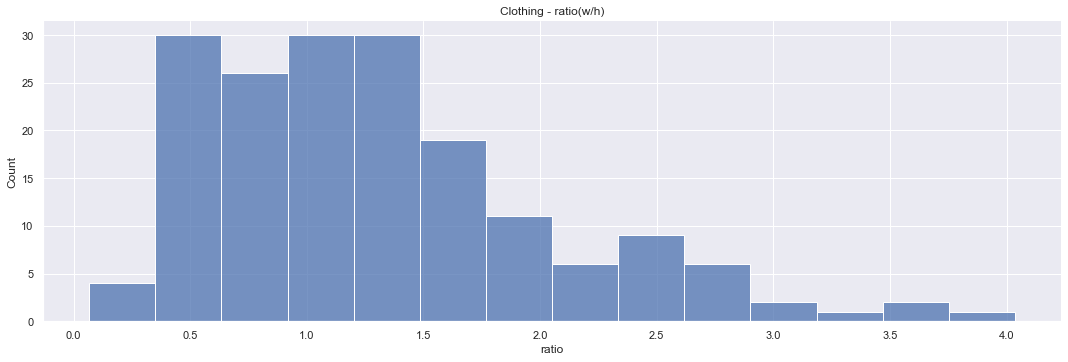

In [11]:
for c in classes:
    cls_df = info[info['name'] == c]
    plot = sns.displot(data=cls_df, x="ratio", aspect=3,)
    plt.title(f'{c} - ratio(w/h)')
    plt.show()

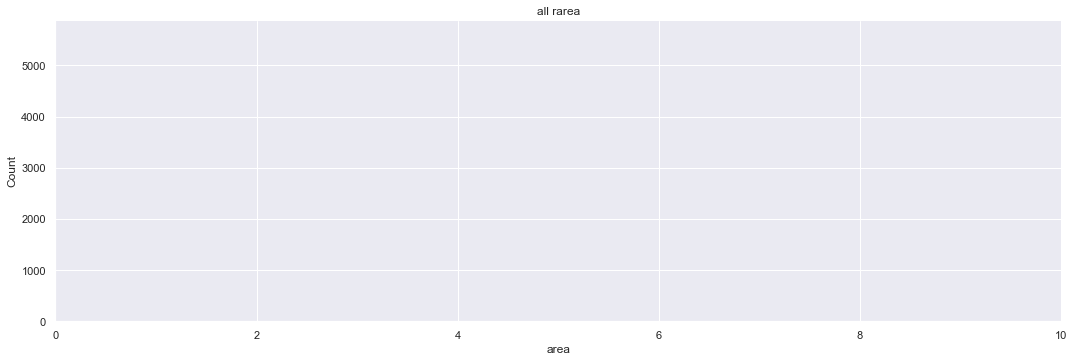

In [12]:

plot = sns.displot(data=info, x="area", aspect=3)
plt.title('all rarea')
plt.xlim(0, 10)
plt.show()

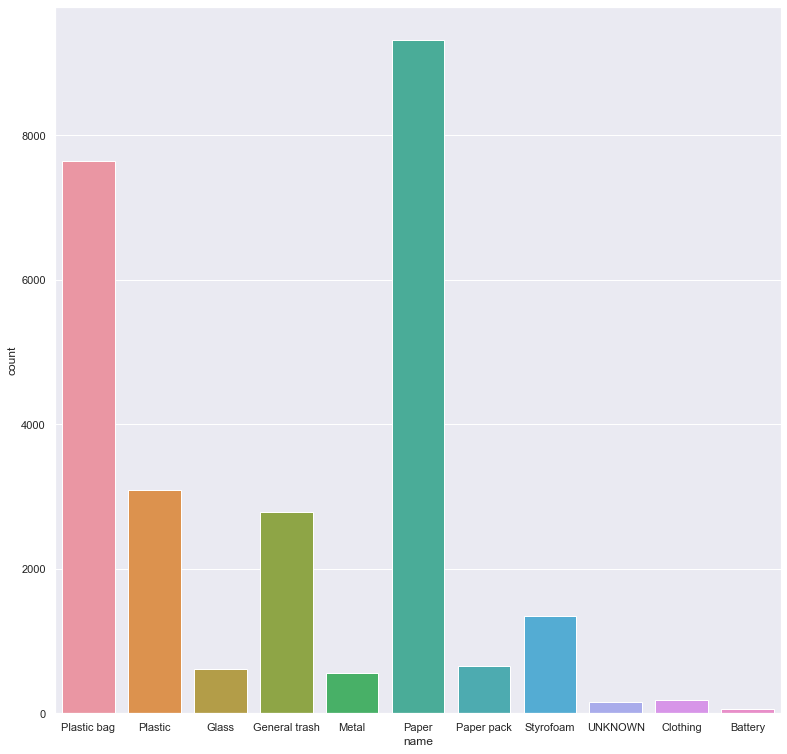

In [13]:
sns.countplot(data=info,x='name')
plt.show()

In [14]:
info['name'].value_counts()

Paper            9311
Plastic bag      7643
Plastic          3090
General trash    2782
Styrofoam        1343
Paper pack        659
Glass             610
Metal             562
Clothing          177
UNKNOWN           160
Battery            63
Name: name, dtype: int64

In [15]:
info[info['ratio']==info['ratio'].max()]

w    h  ratio   name           img_name    id     area
25952  392.7  6.6   59.5  Paper  batch_03/1000.jpg  3196  2591.82

In [16]:
aggs = ['min','max','mean','std']

info.agg(aggs)

w           h      ratio     name           img_name  \
min     3.400000    2.000000   0.038272  Battery  batch_03/1000.jpg   
max   511.900000  511.900000  59.500000  UNKNOWN  batch_03/1000.jpg   
mean  108.921996  112.810178   1.243741      NaN                NaN   
std    90.645522   91.864583   1.384606      NaN                NaN   

               id          area  
min      0.000000      15.17000  
max   3271.000000  262041.61000  
mean  1655.266591   18069.01161  
std    759.116667   28425.59675

In [17]:
print(info.agg(aggs)[['w','h','ratio']])

               w           h      ratio
min     3.400000    2.000000   0.038272
max   511.900000  511.900000  59.500000
mean  108.921996  112.810178   1.243741
std    90.645522   91.864583   1.384606


In [18]:
for c in classes:
    now_info = info[info['name']==c]
    print(c)
    print(now_info.agg(aggs)[['w','h','ratio']],'\n\n')

UNKNOWN
               w           h     ratio
min     5.200000    3.800000  0.150334
max   511.800000  511.900000  8.303030
mean   65.990000   57.886875  1.531236
std    78.942955   74.735684  1.262334 


General trash
               w           h      ratio
min     3.400000    3.300000   0.040657
max   511.900000  511.900000  34.800000
mean   87.355931   87.856830   1.364141
std    92.077956   92.556179   1.529002 


Paper
               w           h      ratio
min     3.600000    2.000000   0.038272
max   511.900000  511.900000  59.500000
mean  112.022801  104.088057   1.405380
std    93.631574   84.654808   1.837946 


Paper pack
               w           h     ratio
min     7.100000    5.500000  0.193246
max   457.700000  492.600000  5.699634
mean   97.033232   88.132170  1.287543
std    98.100798   88.728261  0.793204 


Metal
               w           h      ratio
min    10.500000    3.300000   0.096688
max   500.000000  469.500000  47.688172
mean  122.018327  117.270641   1.

In [19]:
def save_all_images(coco,label2name,save_path='imgs',root='input/data'):

    classes = ("UNKNOWN", "General trash", "Paper", "Paper pack", 
    "Metal", "Glass",  "Plastic", "Styrofoam", 
    "Plastic bag", "Battery", "Clothing")
    for c in classes:
        folder = os.path.join(save_path,c)
        if not os.path.exists(folder):
            os.makedirs(folder)


    for idx in range( len( coco.getImgIds() ) ):
        info = coco.loadImgs(idx)[0]
        img = cv2.imread(os.path.join(root,info['file_name']))
        ann_ids = coco.getAnnIds(idx)
        ann_info = coco.loadAnns(ann_ids)

        for i,ann in enumerate(ann_info):
            cls_name = label2name[ann['category_id']]
            x1, y1, w, h = ann['bbox']
            cv2.imwrite(f'{os.path.join(save_path,cls_name,f"{idx}_{str(i)}")}.jpg',img[int(y1):int(y1+h),int(x1):int(x1+w)])
        
    

In [20]:
# save_all_images(coco,label2name)